<a href="https://colab.research.google.com/github/pkams/bootcamp_IGTI/blob/master/aula_1_8_datapreprocessingapplication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
customers = pd.read_csv('/content/Mall_Customers.csv')

In [0]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [0]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [0]:
customers.isnull().sum() #Quantidade de valores nulos em cada coluna

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [0]:
# Adicionando manualmente valores nulos
customers_null = customers
for col in customers_null.columns:
  customers_null.loc[customers_null.sample(frac=0.1).index, col] = np.nan

# frac = 0.1 vai colocar 10% de valores nulos (20 em cada coluna)

In [0]:
customers_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              180 non-null    float64
 1   Gender                  180 non-null    object 
 2   Age                     180 non-null    float64
 3   Annual Income (k$)      180 non-null    float64
 4   Spending Score (1-100)  180 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [0]:
customers_null.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.0,15.0,NaN
1,2.0,Male,21.0,15.0,81.0
2,3.0,NaN,20.0,16.0,6.0
3,4.0,Female,23.0,16.0,77.0
4,5.0,Female,31.0,17.0,40.0


In [0]:
customers_null.isnull().sum()

CustomerID                20
Gender                    20
Age                       20
Annual Income (k$)        20
Spending Score (1-100)    20
dtype: int64

In [0]:
# Deletando linhas com valores nulos
customers_null.dropna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
3,4.0,Female,23.0,16.0,77.0
5,6.0,Female,22.0,17.0,76.0
6,7.0,Female,35.0,18.0,6.0
8,9.0,Male,64.0,19.0,3.0
10,11.0,Male,67.0,19.0,14.0
...,...,...,...,...,...
187,188.0,Male,28.0,101.0,68.0
189,190.0,Female,36.0,103.0,85.0
193,194.0,Female,38.0,113.0,91.0
197,198.0,Male,32.0,126.0,74.0


In [0]:
# Preenchenco os nulos
customers_null.fillna(0)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.0,15.0,0.0
1,0.0,Male,0.0,0.0,81.0
2,3.0,0,20.0,16.0,0.0
3,4.0,Female,23.0,16.0,77.0
4,5.0,Female,0.0,17.0,0.0
...,...,...,...,...,...
195,196.0,Female,0.0,120.0,79.0
196,197.0,Female,45.0,126.0,0.0
197,198.0,Male,32.0,126.0,74.0
198,199.0,Male,0.0,137.0,18.0


In [0]:
customers_null.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,162.000000,162.000000,162.000000,162.000000
mean,100.938272,39.074074,59.388889,52.438272
std,57.629217,14.155549,26.189527,25.982541
min,1.000000,18.000000,15.000000,1.000000
25%,51.250000,29.000000,39.250000,35.250000
50%,100.000000,36.000000,60.000000,53.500000
75%,150.750000,48.750000,77.000000,74.000000
max,200.000000,70.000000,137.000000,99.000000


In [0]:
# Preenchenco com média das colunas em cada coluna
customers_null.fillna(customers_null.mean())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.000000,Male,19.000000,15.000000,52.438272
1,100.938272,Male,39.074074,59.388889,81.000000
2,3.000000,NaN,20.000000,16.000000,52.438272
3,4.000000,Female,23.000000,16.000000,77.000000
4,5.000000,Female,39.074074,17.000000,52.438272
...,...,...,...,...,...
195,196.000000,Female,39.074074,120.000000,79.000000
196,197.000000,Female,45.000000,126.000000,52.438272
197,198.000000,Male,32.000000,126.000000,74.000000
198,199.000000,Male,39.074074,137.000000,18.000000


In [0]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,162.000000,162.000000,162.000000,162.000000
mean,100.938272,39.074074,59.388889,52.438272
std,57.629217,14.155549,26.189527,25.982541
min,1.000000,18.000000,15.000000,1.000000
25%,51.250000,29.000000,39.250000,35.250000
50%,100.000000,36.000000,60.000000,53.500000
75%,150.750000,48.750000,77.000000,74.000000
max,200.000000,70.000000,137.000000,99.000000


In [0]:
# Verificando Outliers

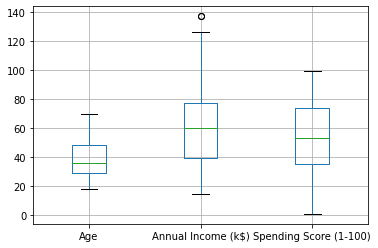

In [0]:
# Técnica 1 => Visualização de Boxplot
boxplot = customers.boxplot(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

In [0]:
# Técnica 2 - Usando Z-Score

from scipy import stats
z = np.abs(stats.zscore(customers['Annual Income (k$)'].values))
threshold = 2
result = np.where(z > threshold)

z, result

# Nenhum valor foi considerado outlier



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


(array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan

In [0]:
df_salario_outlier=customers.iloc[result[0]]
df_salario_outlier

# confirmando que nenhum retornou

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


Text(0.5, 1.0, 'Distribuição dos clientes quanto a genero')

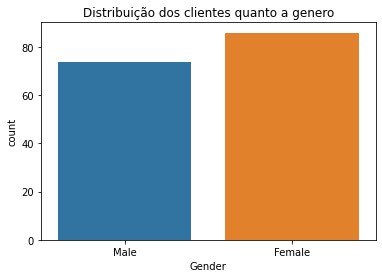

In [0]:
# Explorando dados

sns.countplot(x='Gender', data=customers)
plt.title('Distribuição dos clientes quanto a genero')

Text(0.5, 0, 'Idade')

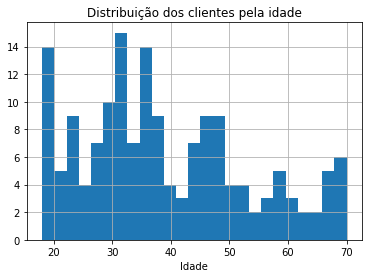

In [0]:
customers.hist('Age', bins=25)
plt.title('Distribuição dos clientes pela idade')
plt.xlabel('Idade')

In [0]:
# Aplicando codificação dos dados

cat_df_customers = customers.select_dtypes(include='object')
# Salvando váriaveis categóricas

In [0]:
cat_df_customers.head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female


In [0]:
replace_map = {'Gender':{'Male':1, 'Female':2}} 
# Definindo dicionário a ser utilizado
labels = cat_df_customers['Gender'].astype('category').cat.categories.tolist()
replace_map_comp = {'Gender': {k: v for k, v in zip(labels, list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'Gender': {'Female': 1, 'Male': 2}}


In [0]:
cat_df_customers['Gender'].astype('category').cat.categories.tolist()

['Female', 'Male']

In [0]:
cat_df_customers_replace = pd.read_csv('/content/Mall_Customers.csv')
cat_df_customers_replace.replace(replace_map_comp, inplace=True)
# Aplica mapeamento para dataset
cat_df_customers

,Gender
0,2
1,2
2,1
3,1
4,1
...,...
195,1
196,1
197,2
198,2


In [0]:
# Com LabelEncoder

customers = pd.read_csv('/content/Mall_Customers.csv')

In [0]:
cat_df_customers_lc = customers

In [0]:
cat_df_customers_lc['Gender'] = pd.Categorical(cat_df_customers_lc['Gender'])
cat_df_customers_lc.dtypes

CustomerID                   int64
Gender                    category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object

In [0]:
# Usando função interna do Pandas

cat_df_customers_lc['Gender'] = cat_df_customers_lc['Gender'].cat.codes 
cat_df_customers_lc.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [0]:
# Importando LabelEncoder do ScikitLearn

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [0]:
customers_label = pd.read_csv('/content/Mall_Customers.csv')
customers_label['Gender'] = le.fit_transform(customers_label['Gender'])
customers_label.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [0]:
# Usando pd.get_dummies
customers_one_hot = pd.read_csv('/content/Mall_Customers.csv')
customers_one_hot = pd.get_dummies(customers_one_hot)
customers_one_hot.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [0]:
customers_one_hot = pd.read_csv('/content/Mall_Customers.csv')

In [0]:
# Usando One Hot Encoder

from sklearn.preprocessing import OneHotEncoder

ohs = OneHotEncoder()

In [0]:
customers_ohs = ohs.fit_transform(customers_one_hot['Gender'].values.reshape(-1,1)).toarray()
customers_ohs.shape

(200, 2)

In [0]:
customers_ohs

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.